<h1> Nanotechnology Practical </h1>

<h2> 0. Getting set up </h2>

<h3> 0.1 How to use this notebook </h3> 
<br>
<font size="3">
This exercise is written using a programming language called Python. It is used not only by scientists but also people working in data science, AI, engineering and many other fields because it is free and relatively simple to get started on. 
<br>
<br>
Don't worry - you don't need to know any Python to run this exercise! We are going to work through everything together. However, everything is written so that you can run some Python code without having to write anything yourself if you don't want to. Remember - the purpose of this practical is to give you a feel for things. I don't expect you to remember or understand everything, particularly the Python code. 
<br>
<br>
Today, we will be running Python using this <i>Jupyter</i> notebook. All of the Python code is broken down into individual cells. You work through the notebook by running each cell in turn. To do this, (1) left click on the cell you want to run. (2) Press <b>Run </b> at the top of the page, or press <b> shift + Enter </b> together. 
</font>



<div class="alert alert-block alert-success">
<font size="3">
<b>Question 0:</b> Try running the cell below (Python should output "My name is Bob"). Then try changing the name.
</font>
</div>

In [ ]:
# Get Python to output some text

name = "Bob" # <- try changing the text by replacing what is inside the "---"

print("My name is %s" %name)

<h3> 0.2 Setting up Python </h3>
<br>
<font size="3">
Before we can start looking at some data, we need to import some packages to help Python run. We also need to load our data. 
<br><br>
Try running the two cells below in order. 
</font>

In [3]:
################################# Import all of the necessary Python packages ################################# 

from PIL import Image # for handling images
import numpy as np # for dealing running calculations on our images
from numpy import genfromtxt # for loading data files
from matplotlib import pyplot as plt # for creating nice plots of our data
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)

In [18]:
########################################  Load our data into Python  ######################################### 

# SEM images
sem_image_mono = Image.open(r"1L_graphene.png", 'r')
sem_image_multi = Image.open(r"ML_graphene.png",'r')
sem_image_messy = Image.open(r"messy_graphene_v2.png",'r')

# Raman spectra and maps
raman_spectrum = genfromtxt(r"Raman_spectrum.txt", delimiter=",")
raman_map_D = genfromtxt(r"D.txt",delimiter=",")
raman_map_G = genfromtxt(r"G.txt",delimiter=",")
raman_map_2D = genfromtxt(r"2D.txt",delimiter=",")

<h2> 1. Looking at graphene with a scanning electron microscope (SEM)</h2>

<h3> 1.1 What is a scanning electron microscope (SEM)? </h3>
<br>
<font size="3">
As the name suggests, it's a microscope! But, this is no ordinary microscope. 
<br>
<br>
With a "normal" microscope, images are formed by collecting visible light that reflects off from objects. This type of microscope is also called an optical microscope. In a scanning electron microscope, we don't use light to create our images. Instead, a tightly focused beam of electrons is scanned over the material. This causes the material to eject electrons of its own, which we can collect to form an image. 
</font>
<br>
<br>
<img src="SEM_mechanism.png" alt="Alt" title="How SEM works" style="height:380px"/>

<h3> 1.2 Why electrons though? </h3>
<br>
<font size="3">
An image can only be as detailed as the probe we use. If we want to see something on the nanoscale, we have to use something equally small. Imagine trying to feel nano-sized bumps with your finger - no chance. Remember that visible light has a wavelength between ~400 and 700 nanometres? This is too long if you want to see anything that is 1, 10 or even 100 nanometres. Visible light is too "big". 
<br>
<br>
Due to quantum mechanics, electrons also have wavelengths. In a scanning electron microscope, electrons can have wavelengths of down to 0.01 nanometres! This makes them much better suited for looking at fine, nanoscale features. 
</font>
    
<h3> 1.3 SEM image of graphene </h3>
<br>
<font size="3">
Let's have a look at some SEM images of graphene! Try running the cells below.
</font>

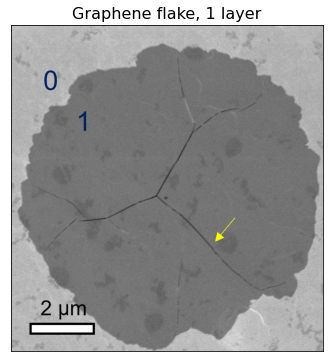

In [14]:
# SEM image of a graphene flake (1 layer)

fig,ax = plt.subplots(figsize=(6,6));
ax.imshow(np.asarray(sem_image_mono), cmap="gray"); # <- this line specifies which picture is being shown. 

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.title("Graphene flake, 1 layer", fontsize=16);

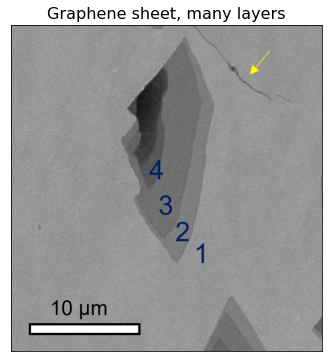

In [6]:
# SEM image of many layers of graphene

fig,ax = plt.subplots(figsize=(6,6));
ax.imshow(np.asarray(sem_image_multi), cmap="gray"); # this line specifies which file to show. Here, the file name is "sem_image_multi"

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.title("Graphene sheet, many layers", fontsize=16);


<font size="3">
Some important features!
    
 - <h4> Number of layers </h4><br>
We can see graphene even when it is just 1 layer of carbon atoms!!  <br>
When we have multiple layers, the contrast changes in steps. If we want to use graphene for electronics, the number of layers is very important to control because it can dramatically change how it conducts electricity. 

 - <h4> Wrinkles </h4><br>
We can also see some dark thin lines running across our graphene, which are usually wrinkled. In general, wrinkles are not good as they can strain graphene's chemical bonds and make the material defective. 
</font>

<font size="3">
Let's try something a bit harder - a slightly messier sample of graphene.
</font>

<div class="alert alert-block alert-success">
<font size="3">
<b>Question 1:</b> Can you get Python to display the image "sem_image_messy"? <br><br> Hint 1: Try copying the code from the previous cell and changing the file name. <br>Hint 2: Too much? Don't worry! The answer is at the bottom of the notebook.
</font>
</div>

In [ ]:
###################################  Display the image "sem_image_messy"  ######################################


<div class="alert alert-block alert-success">
<font size="3">
<b>Question 2:</b> Can you figure out what's happening in this SEM image? What features can you see in the graphene?
</font>
</div>

<h2> 2. Raman Spectroscopy</h2>

<font size="3">
<br>
Now that we've seen what graphene looks like, let's try to understand a bit more about the chemistry of the material. To do so, we are going to use Raman spectroscopy. 
<br>
</font>
    
<h3> 2.1 What is Raman spectroscopy? </h3>
<br>
<font size="3">
Raman spectroscopy is a technique that allows us to understand how elements are chemically bonded in a material. First, we shine a material with an intense laser, causing the laser to be scattered. Some of the laser's energy is transferred to the material, causing certain chemical bonds in it to vibrate - this is known as <b>Raman scattering</b>. To analyse a material, we collect all of the laser light after it has been scattered and has activated these vibrations. 

<img src="Raman_mechanism.png" alt="Alt" title="How Raman spectroscopy works" style="height:400px"/>

Each vibration needs a different amount of energy to activate. Therefore, the laser loses well-defined amounts of energy corresponding to each vibration - we view this by plotting a <b>spectrum</b>. 
<br>
<br>
</font>

<div class="alert alert-block alert-success">
<font size="3">
<b>Question 3:</b> Can you name of any other types of spectroscopy?
</font>
</div>

<h3> 2.2 Raman spectroscopy for graphene </h3>
<br>
<font size="3">
As an example, let's take a look at what a Raman spectrum of graphene looks like.
</font>

In [ ]:
# Some parameters to control how the plot looks
size = (10,6)
x_limits = [1300,2800]
y_limits = [-30,1300]

# Plot the data
fig,ax = plt.subplots(figsize=size)
plt.plot(raman_spectrum[:,0],raman_spectrum[:,1])

# Labelling axes, configuring the plot
plt.xlabel("Wavenumber / cm$^{-1}$", fontsize=17)
plt.ylabel("Intensity", fontsize=17)
plt.xticks(np.arange(x_limits[0],x_limits[1],200), fontsize=14)
plt.yticks(fontsize=14)
ax.xaxis.set_minor_locator(MultipleLocator(50))
ax.yaxis.set_minor_locator(MultipleLocator(50))
plt.xlim(x_limits);
plt.ylim(y_limits);
plt.title("Raman spectrum of graphene", fontsize=18, pad=12);


# Labelling the peaks
plt.text(1320,120,"D", fontsize=17);
plt.text(1570,520,"G", fontsize=17);
plt.text(2650,1220,"2D", fontsize=17);

<font size="3">
The Raman spectrum is made up of several peaks. Each one corresponds to a specific bond vibration. You can think of the x-axis (wavenumber) as showing energy. So, each peak (i.e. vibration) has a different energy. 
<br><br>
Graphene has 3 characteristic peaks that are important: (1) D peak, (2) G peak and (3) 2D peak.<br>

 - The D peak is an indicator of how "bad" our graphene is (i.e. how <b>D</b>efective it is). 
<br>
<br>
 - The G peak is the main graphene peak (the "G" comes from <b>G</b>raphite, because this peak was first measured using graphite). <br> Usually, thicker graphene = taller G peak. 
 <br>
<br>
 - Measuring the width of the 2D peak is another way to tell how many layers of graphene there are. 
</font>

<h3> 2.3 Raman spectroscopy maps </h3>
<br>
<font size="3">
The chemical properties of graphene can change across a flake. So, we want to be able to see how the Raman spectrum of graphene changes with location. For example, what if we could see which parts of graphene are "bad" by looking for areas with tall D peaks?
<br>
<br>
We can do this by taking Raman spectroscopy maps. <br> Instead of taking just 1 spectrum, we collect 100s or 1000s of Raman spectra from across our graphene. Run the cell below for an example:
</font>

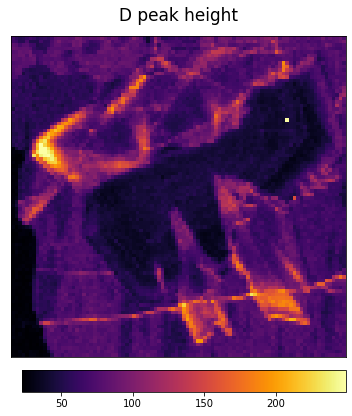

In [9]:
fig,ax=plt.subplots(figsize=(6,6));
cax = fig.add_axes([0.15,0.05, 0.75, 0.05])
im = ax.imshow(raman_map_D,vmax=0.2*np.amax(raman_map_D),cmap="inferno");
ax.axes.xaxis.set_visible(False);
ax.axes.yaxis.set_visible(False);
fig.colorbar(im, cax=cax, orientation="horizontal");
ax.set_title("D peak height", fontsize=17, pad=15);

<font size="3">
The map shows how tall (intense) the D peak was across this graphene sample. Don't worry about trying to understand everything now. This is just to demonstrate we can do this!
</font>

<h2> 3. Using SEM and Raman spectroscopy together </h2>
<br>
<font size="3">
SEM and Raman spectroscopy are very powerful tools, especially when we use them together. SEM can tell us about how the graphene physically looks. Raman spectroscopy can give us chemical information. By bring them together, we can get a much better idea of what is happening with our material!
<br>

Let's look at graphene again, except this time we will use both SEM and Raman spectroscopy and look for any correlations. 
<br>
</font>

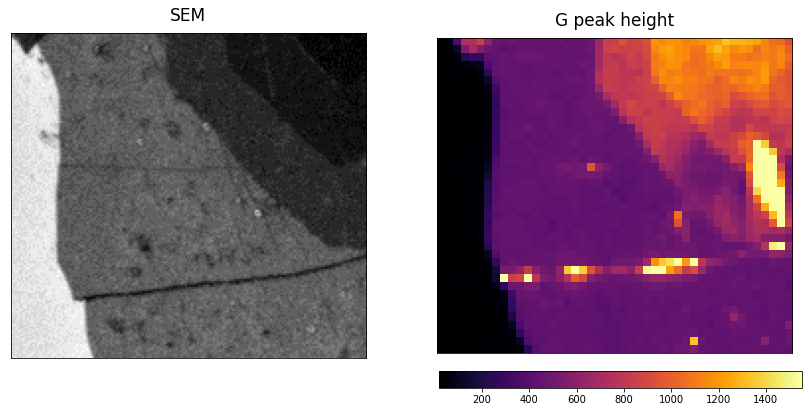

In [19]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,12))

im1 = ax1.imshow(np.asarray(sem_image_messy)[345:510,370:550], cmap="gray")
ax1.axes.xaxis.set_visible(False)
ax1.axes.yaxis.set_visible(False)
ax1.set_title("SEM", fontsize=17, pad=12)

im2 = ax2.imshow(raman_map_G[50:,0:45],vmax=0.1*np.amax(raman_map_G),cmap="inferno")
cax2 = fig.add_axes([0.55,0.28, 0.36, 0.02])
ax2.axes.xaxis.set_visible(False)
ax2.axes.yaxis.set_visible(False)
ax2.set_title("G peak height", fontsize=17, pad=12);
fig.colorbar(im2, ax=ax2, cax=cax2, orientation="horizontal");

<font size="3">
The left-hand image is a close-up SEM image of our "messy" graphene. <br> The right-hand image shows how intense (i.e. tall) our G peak across the same area. Remember - the G peak is related to how much graphene we have!
</font>

<div class="alert alert-block alert-success">
<font size="3">
<b>Question 4:</b> Which parts of the SEM image show the lowest G peak height? 
    
</font>
</div>

<div class="alert alert-block alert-success">
<font size="3">
<b>Question 5:</b> Can you suggest a relationship between the colour in the SEM image and the height of the G peak? What does this mean in terms of graphene thickness?
</font>
</div>

<h2> Extra stuff for the keen beans! (or if we have time) </h2>
<br>
<font size="3">
Repeat the same comparative analysis of SEM and Raman spectroscopy but for the D peak. Remember, this peak is a signature of defects in the graphene. 
</font>

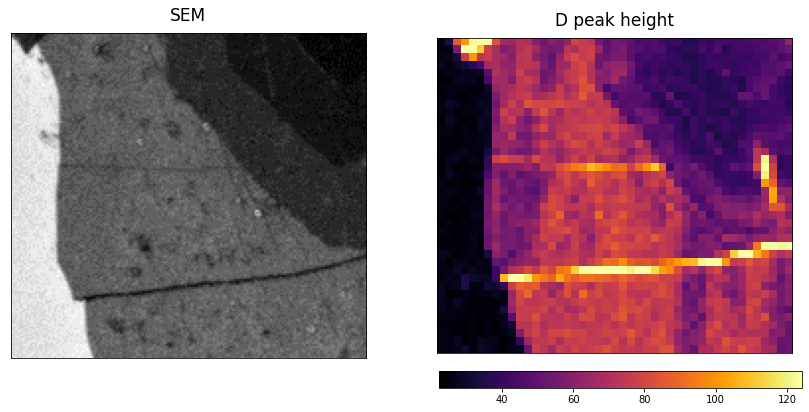

In [20]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,12))

im1 = ax1.imshow(np.asarray(sem_image_messy)[345:510,370:550], cmap="gray")
ax1.axes.xaxis.set_visible(False)
ax1.axes.yaxis.set_visible(False)
ax1.set_title("SEM", fontsize=17, pad=12)

im2 = ax2.imshow(raman_map_D[50:,0:45],vmax=0.1*np.amax(raman_map_D),cmap="inferno")
cax2 = fig.add_axes([0.55,0.28, 0.36, 0.02])
ax2.axes.xaxis.set_visible(False)
ax2.axes.yaxis.set_visible(False)
ax2.set_title("D peak height", fontsize=17, pad=12);
fig.colorbar(im2, ax=ax2, cax=cax2, orientation="horizontal");

<div class="alert alert-block alert-success">
<font size="3">
<b>Extra question:</b> What graphene features in the SEM corresponds to the tallest D peak?
</font>
</div>

<h2> Question Solutions </h2>

<font size="4">Question 1</font>

In [ ]:
# Example solution code for showing the image "sem_image_messy"

fig,ax = plt.subplots(figsize=(10,10));
plt.imshow(sem_image_messy, cmap="gray");
plt.xticks([]);
plt.yticks([]);

<font size="4">Question 2</font>
<font size="3">
 - The graphene is not continous; the left part of the image has no graphene.
 - The graphene is wripped and has cracks in several places. (E.g. bottom right of the image)
 - There is a small island where there are many layers of graphene sequentially stacked. 
</font>

<font size="4">Question 3</font>
<font size="3">
 - <b> Flame emission spectroscopy </b> - analyses the concentration of metals by burning them. 
 - <b> Infra-red (IR) spectroscopy </b> - also looks at chemical bond vibrations.
 - <b> Nuclear Magnetic Resonance (NMR) spectroscopy </b> - looks for different chemical environments around a target element. 
</font>

<font size="4">Question 4</font>
<br><br>
<font size="3">
The smallest G peak occurs where there is no graphene. This corresponds to the bright region in the SEM image (left hand side). 
</font>


<font size="4">Question 5</font>
<br>
<br>
<font size="3">
In general*, areas of graphene that look darker in the SEM (i.e. they are thicker bits of graphene), the taller the G peak. This makes sense because thicker areas have <b>more</b> graphene!
</font>


<font size="4">Extra question</font>
<br>
<br>
<font size="3">
The region with the tallest D peaks correspond to wrinkles that can be seen in the SEM image. 
</font>


In [22]:
%load_ext watermark

%watermark -v -m -p PIL,numpy,matplotlib

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.7.3
IPython version      : 7.10.2

PIL       : 6.1.0
numpy     : 1.17.4
matplotlib: 3.1.1

Compiler    : MSC v.1915 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 78 Stepping 3, GenuineIntel
CPU cores   : 4
Architecture: 64bit

